## Table of Contents
<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#assess">Data Assessment</a></li>
<li><a href="#cleaning">Data Cleaning/Preprocessing</a></li>
<li><a href="#model">Models</a></li>
<li><a href="#Results">Results/Findings</a></li>
<li><a href="#sumbit">Submission</a></li>
</ul>

## Preliminary Wrangling

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

sns.set()
%matplotlib inline

In [3]:
# Loading train and test dataset
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
df = pd.concat([df_train, df_test]).reset_index(drop=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


<a id='assess'></a>
### Data Assessment

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [7]:
df.describe().T[df.describe().T['min']==0].index

Index(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

### Visualizing Numerical Columns

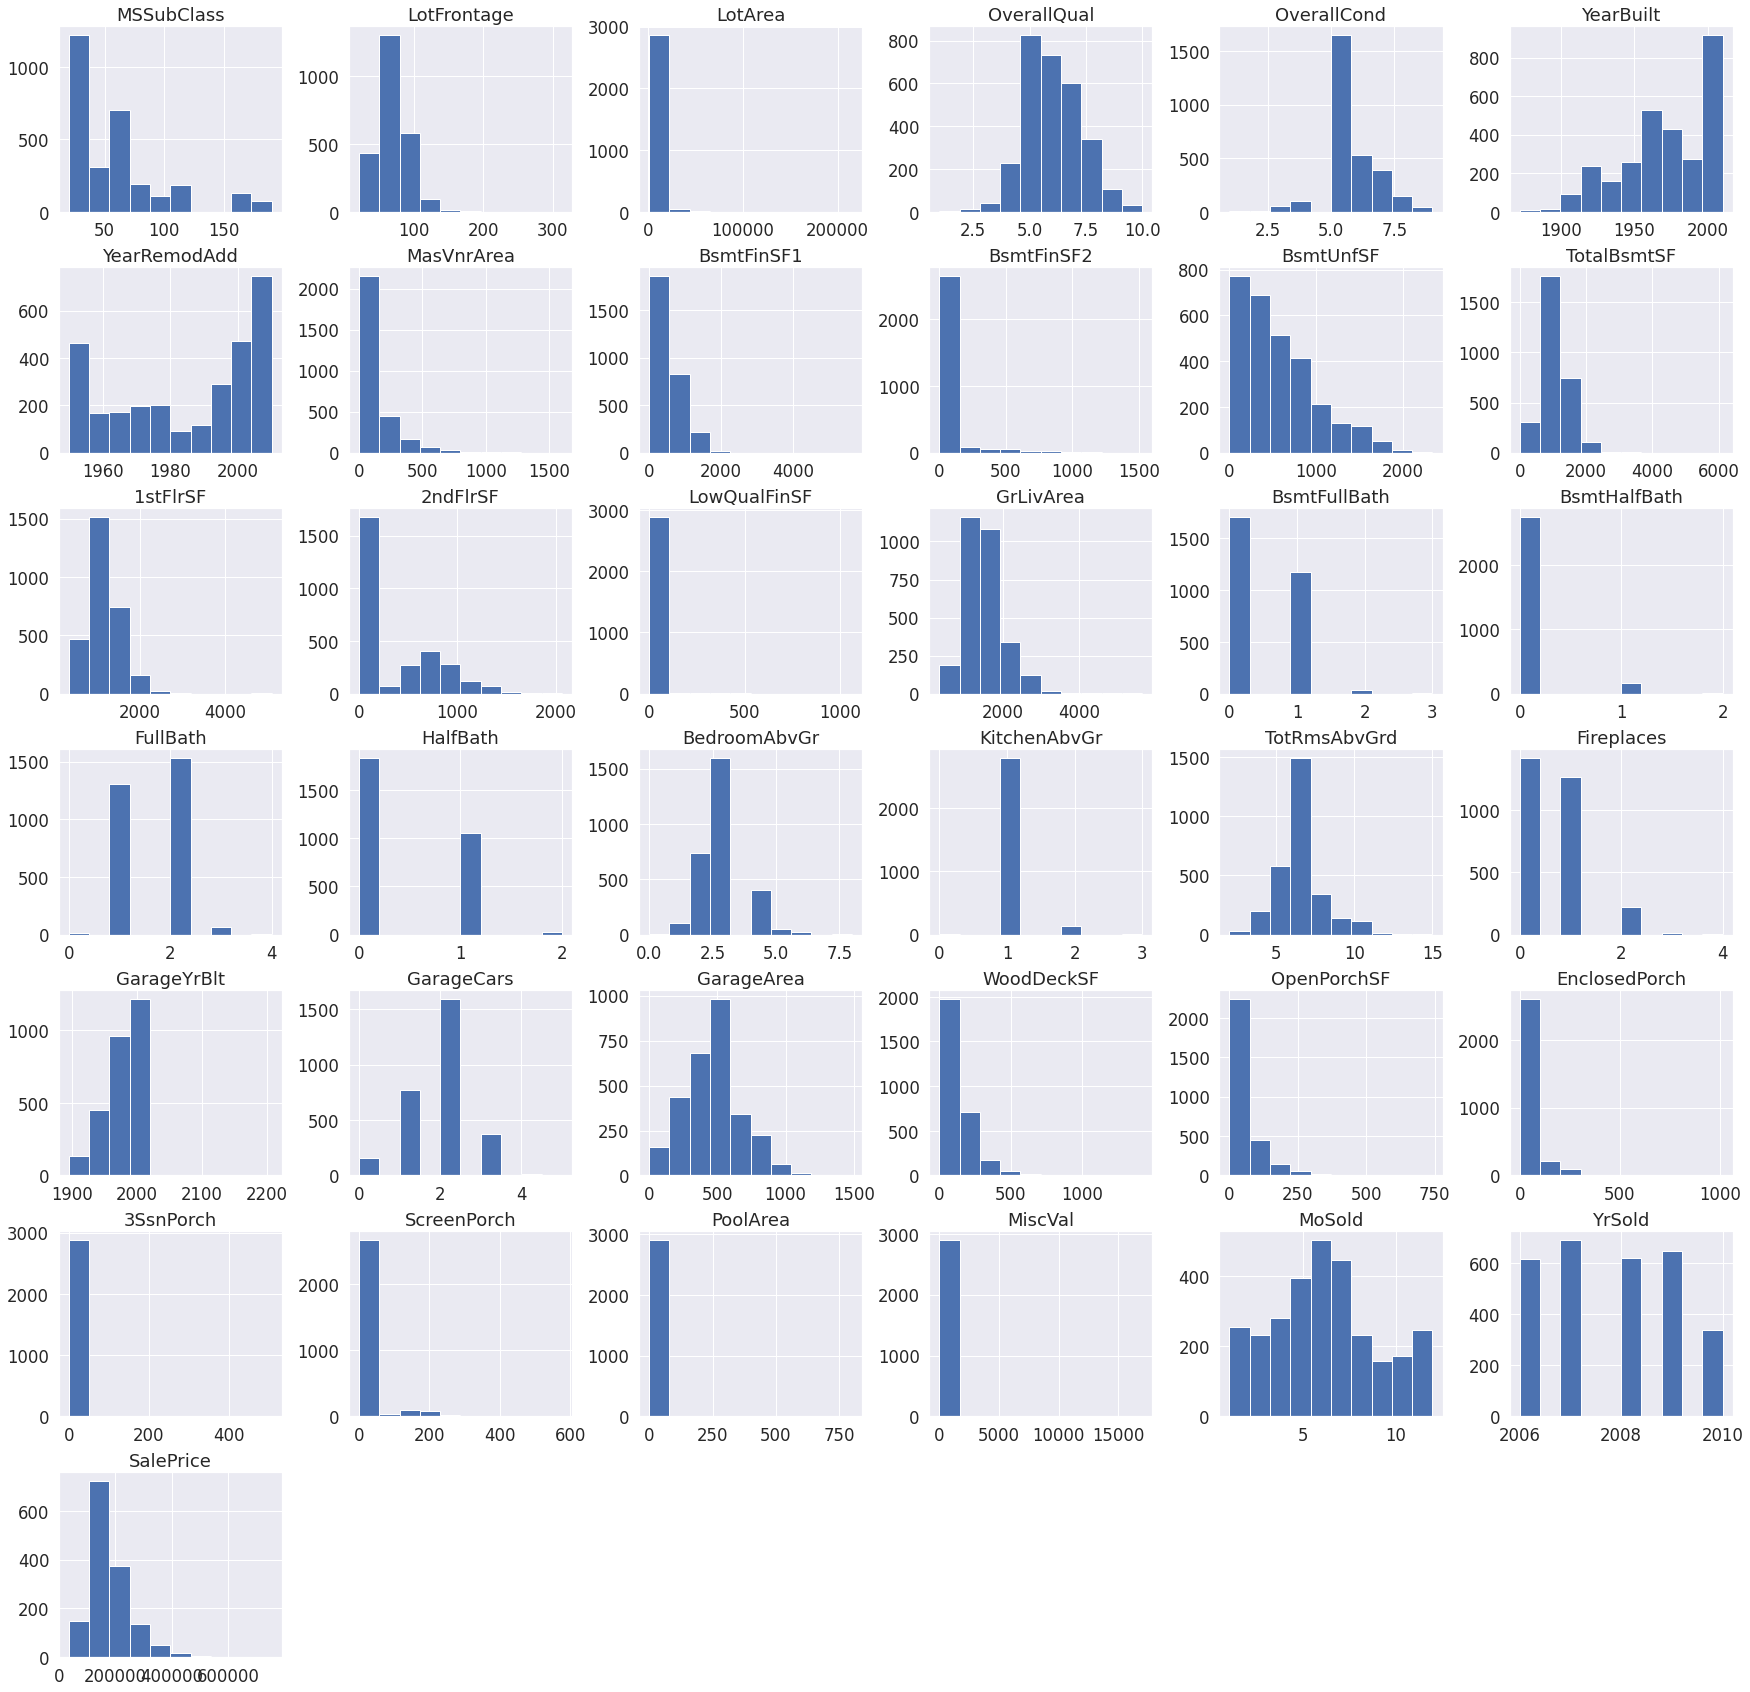

In [8]:
sns.set(font_scale = 1.5)
df.drop('Id', axis=1).hist(figsize = (30, 30));

**Insight**
- The columns listed below has a min value equal to 0. This Zero also mean unavailable:
>MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal.

In [9]:
# Sorting columns with null values
columns_null = [cols for cols in df.columns if df[cols].isnull().sum() > 0]
df[columns_null].isnull().sum().sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64

### **`Data Assessment Results`**
- **Fill NaN with 0:** LotFrontage, MasVnrArea, GarageYrBlt, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, GarageCars, GarageArea
- **MasVnrType:** Convert None to NaN
- **Label Encode:** Street, Utilities, CentralAir
- **One-Hot Encode:** MSZoning, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition

<a id='cleaning'></a>
### Data Cleaning/Preprocessing
> We would first make a copy the dataset, then perform variou cleaning/ preprocessind operation on the dataset

##### **Fill NaN with 0:** LotFrontage, MasVnrArea, GarageYrBlt, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, GarageCars, GarageArea

In [10]:
zero_list = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']

for col in zero_list:
    df[col].fillna(0, inplace = True)
    # Print to confirm
    print(col, df[col].isnull().sum())

LotFrontage 0
MasVnrArea 0
GarageYrBlt 0
BsmtFinSF1 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
BsmtFullBath 0
BsmtHalfBath 0
GarageCars 0
GarageArea 0


##### MasVnrType : Convert None to NaN then one hot

In [11]:
# Converting 'None' to NaN
# df['MasVnrType'] = df['MasVnrType'].replace('None', np.nan)

# Checking Result
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

#### **Label Encode**
> Street, Utilities, CentralAir

In [12]:
binary_columns = [col for col in df.columns if df[col].dtype == "object" and len(df[col].unique()) == 2]
print(binary_columns)

['Street', 'CentralAir']


In [13]:
def label_encoding(df,col):
    label_enc = LabelEncoder()
    df[col] = label_enc.fit_transform(df[col])
    return df

# Label Encoding binary columns
for col in binary_columns:
    df = label_encoding(df,col)

    
# Checking Result
df[binary_columns].sample(5)

,Street,CentralAir
1120,1,1
874,1,1
602,1,1
1910,1,1
1145,1,1


#### **One-Hot Encode**
> MSZoning, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition

In [14]:
one_hot_cols = [cols for cols in df.columns if df[cols].dtype == 'object' and len(df[cols].unique()) > 2]
df = pd.get_dummies(df, columns= one_hot_cols)
# Checking Results
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,1,7,5,2003,2003,196.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,1,6,8,1976,1976,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,1,7,5,2001,2002,162.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,1,7,5,1915,1970,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,1,8,5,2000,2000,350.0,...,0,0,0,1,0,0,0,0,1,0


<a id='model'></a>
## **MODELS**

#### Importing Libraries

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, ElasticNet, LassoCV, RidgeCV, ElasticNetCV

#### Define a function to return root-mean squared error(RMSE)

In [16]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

#### Splitting Data into X(features) and Y(target)

In [17]:
X = df.drop(columns=['Id', 'SalePrice'], axis=1)
Y = df['SalePrice']

#### Split Data into train and test data

In [18]:
X_train_val = X.loc[:1459, :]
Y_train_val = Y.loc[:1459]
X_test = X.loc[1460:, :]
Y_test = Y.loc[1460:]

X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, random_state=19, test_size=0.1)

### Linear Regression

In [19]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)

lin_pred= lin_model.predict(X_val)
lin_rmse = rmse(Y_val, lin_pred)
print('RMSE:', lin_rmse)

RMSE: 39736.329268839996


### Lasso Regression

In [20]:
alpha1 = [0.005, 0.05, 0.1, 0.3, 1, 5, 20, 50, 80, 100, 120, 140]

lassorCV = LassoCV(alphas=alpha1, max_iter= 5e4,cv=5)
lassorCV.fit(X_train, Y_train)

lassorCV_rmse = rmse(Y_val, lassorCV.predict(X_val))
print('alpha:',lassorCV.alpha_)
print('RMSE:',lassorCV_rmse)

alpha: 50.0
RMSE: 39128.72346473658


### Ridge Regression

In [21]:
alpha2 = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 80, 100]

ridgeCV = RidgeCV(alphas=alpha2, cv=5)
ridgeCV.fit(X_train, Y_train)

ridgeCV_rmse = rmse(Y_val, ridgeCV.predict(X_val))
print('alpha:',ridgeCV.alpha_)
print('RMSE:',ridgeCV_rmse)

alpha: 15.0
RMSE: 35662.709031933824


### ElasticNet Regression

In [22]:
l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alpha1, l1_ratio=l1_ratios,
                            max_iter= 1e4,cv=5)
elasticNetCV.fit(X_train, Y_train)

elasticNetCV_rmse = rmse(Y_val, elasticNetCV.predict(X_val))
print('alpha:',elasticNetCV.alpha_)
print('l1 ratio:', elasticNetCV.l1_ratio_)
print('RMSE:',elasticNetCV_rmse)

alpha: 0.1
l1 ratio: 0.9
RMSE: 35622.4180197414


### LightGBM Regression

In [23]:
from lightgbm import LGBMRegressor

lgbmRegressor = LGBMRegressor()
lgbmRegressor.fit(X_train, Y_train)
lgbm_rmse = rmse(Y_val, lgbmRegressor.predict(X_val))
print('RMSE:', lgbm_rmse)

RMSE: 37835.631582677284


### Gradient Boosting Regression

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

gbRegressor = GradientBoostingRegressor()
gbRegressor.fit(X_train, Y_train)
gb_rmse = rmse(Y_val, gbRegressor.predict(X_val))
print('RMSE:', gb_rmse)

RMSE: 38519.126822103804


### CatBoost Regression

In [25]:
from catboost import CatBoostRegressor

cbRegressor = CatBoostRegressor()
cbRegressor.fit(X_train, Y_train, silent=True)
cb_rmse = rmse(Y_val, cbRegressor.predict(X_val))
print('RMSE:', cb_rmse)

RMSE: 35318.729482726325


### Bayesian Ridge

In [26]:
from sklearn.linear_model import BayesianRidge

brRegressor = BayesianRidge()
brRegressor.fit(X_train, Y_train)
br_rmse = rmse(Y_val, brRegressor.predict(X_val))
print('RMSE:', br_rmse)

RMSE: 35579.687564361135


## Random Forest Regression

In [27]:
from sklearn.ensemble import RandomForestRegressor

rfRegressor = RandomForestRegressor(random_state=19)
rfRegressor.fit(X_train, Y_train)
rf_rmse = rmse(Y_val, rfRegressor.predict(X_val))
print('RMSE:', rf_rmse)

RMSE: 36547.88410710029


### Extra Trees Regressor

In [28]:
from sklearn.ensemble import ExtraTreesRegressor

extRegressor = ExtraTreesRegressor(random_state=19)
extRegressor.fit(X_train, Y_train)
ext_rmse = rmse(Y_val, extRegressor.predict(X_val))
print('RMSE:', ext_rmse)

RMSE: 39223.450800472725


<a id='Results'></a>
## Results/Finding

### Comparing the RMSE calculation from all models

In [29]:
rmse_val =  [lin_rmse, lassorCV_rmse, ridgeCV_rmse, elasticNetCV_rmse, lgbm_rmse, 
             gb_rmse, cb_rmse, br_rmse, rf_rmse, ext_rmse]
labels = ['Linear', 'Lasso', 'Ridge', 'ElasticNet', 'LightGBM', 'Gradient Boosting', 
         'CatBoost', 'Bayesian Ridge', 'Random Forest', 'Extra Trees']

rmse_df = pd.Series(rmse_val, index=labels).to_frame()
rmse_df.rename(columns={0 : 'RMSE'}, inplace=True)
rmse_df.sort_values(by='RMSE')

,RMSE
CatBoost,35318.729483
Bayesian Ridge,35579.687564
ElasticNet,35622.418020
Ridge,35662.709032
Random Forest,36547.884107
LightGBM,37835.631583
Gradient Boosting,38519.126822
Lasso,39128.723465
Extra Trees,39223.450800
Linear,39736.329269


**RESULT:** The best model for is the model with the lowest RMSE score which is the **CatBoost regression model**.

<a id='sumbit'></a>
## Submission

In [30]:
output = pd.DataFrame(columns=["Id","SalePrice"])
output["Id"] = df_test.Id
output["SalePrice"] = cbRegressor.predict(X_test)
output

,Id,SalePrice
0,1461,126832.230985
1,1462,166907.955689
2,1463,190309.036402
3,1464,190817.230841
4,1465,186649.451099
...,...,...
1454,2915,78372.102961
1455,2916,76056.875877
1456,2917,166710.339347
1457,2918,116708.160528


In [31]:
output.to_csv('submission.csv', index=False)
print('Submission succesful!')

Submission succesful!
